## Demand Forecasting for Stores

Data Source: https://www.kaggle.com/datasets/aswathrao/demand-forecasting?select=test_nfaJ3J5.csv

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [3]:
df[['day', 'month', 'year']] = df['week'].str.split('/', expand=True)

In [4]:
df = df.drop('week', axis=1)
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [6]:
X, y = df.drop('units_sold', axis=1), df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
model.score(X_test, y_test)

0.7774105778460026

In [9]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)

In [10]:
rmse

27.02487698955106

In [11]:
df.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

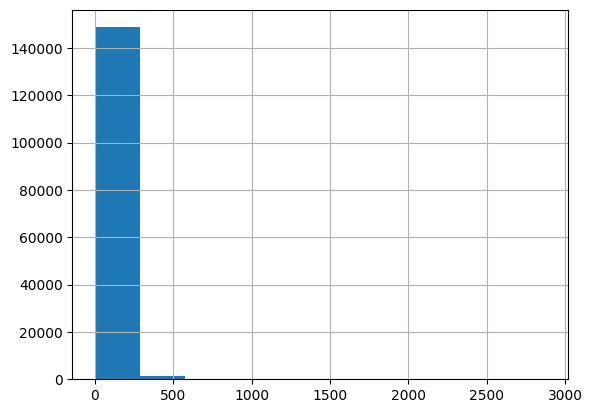

In [12]:
df.units_sold.hist()

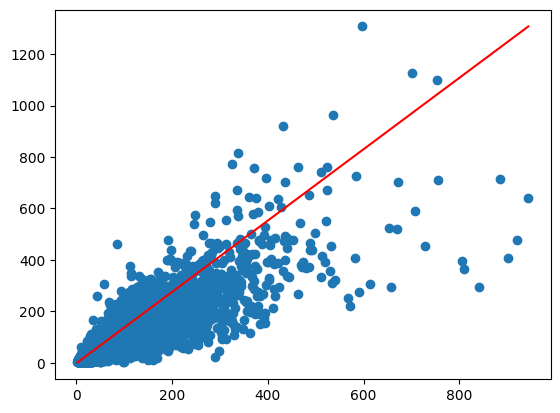

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color='red')

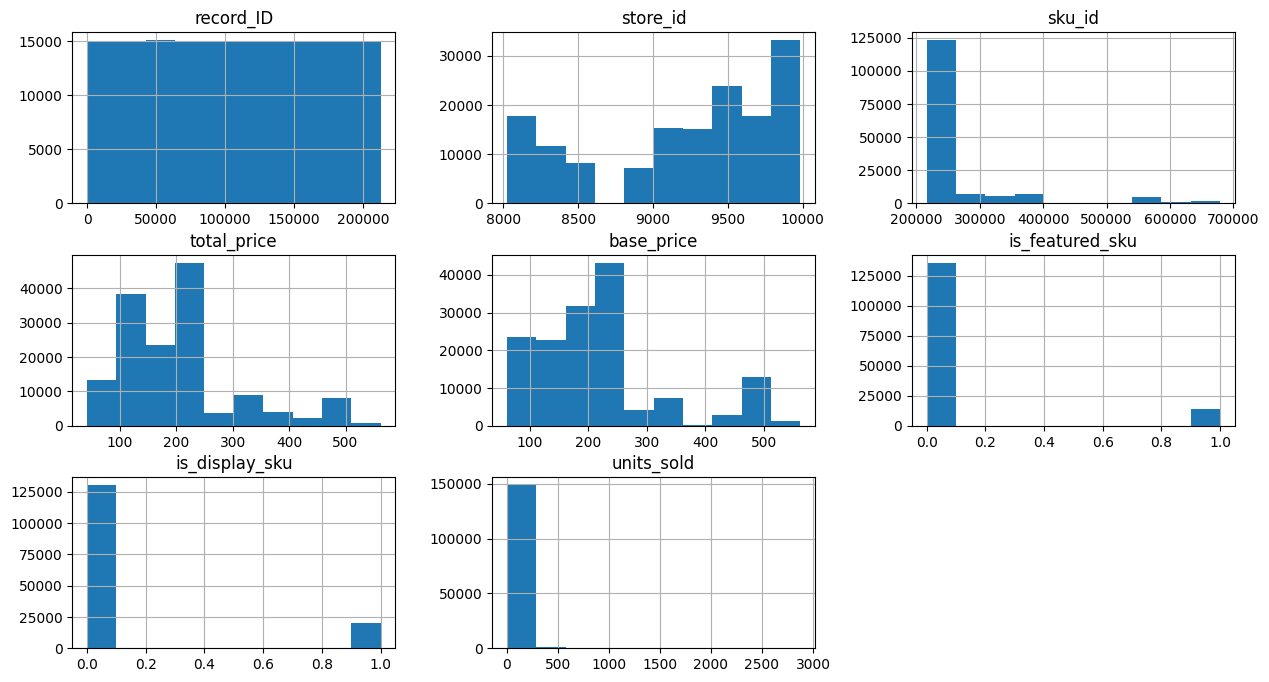

In [14]:
df.hist(figsize=(15, 8))
plt.show()

In [15]:
df = df.drop('record_ID', axis=1)

In [16]:
len(df.store_id.unique())

76

In [17]:
len(df.sku_id.unique())

28

In [18]:
df = df[df.units_sold < df.units_sold.quantile(0.99)]
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


<Axes: >

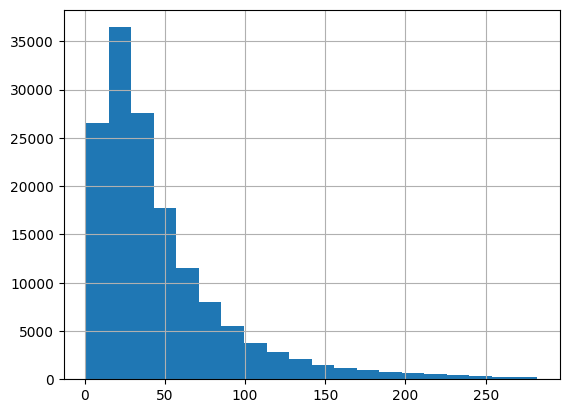

In [19]:
df.units_sold.hist(bins=20)

In [20]:
df = df.join(pd.get_dummies(df.store_id, prefix='store')).drop('store_id', axis=1)

In [21]:
df = df.join(pd.get_dummies(df.sku_id, prefix='item')).drop('sku_id', axis=1)

In [22]:
df

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,store_8058,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,99.0375,111.8625,0,0,20,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150146,235.8375,235.8375,0,0,30,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150147,357.6750,483.7875,1,1,31,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150148,141.7875,191.6625,0,1,12,09,07,13,False,False,...,False,False,False,False,False,False,True,False,False,False


In [23]:
model = RandomForestRegressor()

X, y = df.drop('units_sold', axis=1), df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
model.score(X_test, y_test)

0.8259641950042378

In [26]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

17.807703034892008

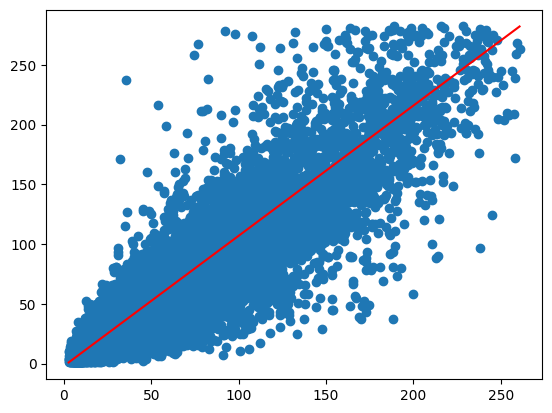

In [27]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color='red')

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20],
    'min_samples_split': [2,3]
}

model = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(model, param_grid, verbose=2, cv=3)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   7.0s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   6.5s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   6.5s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  12.2s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  12.3s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  12.6s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   6.1s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   6.5s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   6.4s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=  11.8s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=  11.9s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=2)

In [34]:
best_model = grid_search.best_estimator_

In [35]:
grid_search.best_params_

{'min_samples_split': 3, 'n_estimators': 20}

In [36]:
best_model.score(X_test, y_test)

0.8212602623886973